In [1]:
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('./imports-by-country-breed-type-age-and-sex-april-2009-1.csv', skiprows=1)

In [3]:
raw_data

,Age,Breed Type,Sex,AUSTRIA,CZECH REPUBLIC,DENMARK,FRANCE,GERMANY,IRELAND,NETHERLANDS,NORTHERN IRELAND,SWEDEN,Unnamed: 12
0,01. Under 1,Non Dairy,F,0,0,0,0,0,24,0,2,0,30
1,NaN,NaN,M,0,0,0,0,0,0,0,1,0,3
2,02. 1 to 2,Non Dairy,F,0,0,0,0,0,18,0,0,0,19
3,NaN,NaN,M,0,0,0,0,0,0,0,1,0,5
4,03. 2 to 3,Dairy,M,0,0,0,0,0,0,0,14,0,14
5,NaN,Non Dairy,F,0,0,0,0,0,0,0,1,0,2
6,NaN,NaN,M,0,0,0,0,0,0,0,0,0,1
7,04. 3 to 4,Dairy,M,0,0,0,0,0,0,0,45,0,45
8,NaN,Non Dairy,F,0,0,0,0,0,0,0,0,0,6
9,NaN,NaN,M,0,0,0,0,0,0,0,1,0,3


In [4]:
raw_data.shape

(45, 13)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               15 non-null     object
 1   Breed Type        26 non-null     object
 2   Sex               44 non-null     object
 3   AUSTRIA           45 non-null     int64 
 4   CZECH REPUBLIC    45 non-null     int64 
 5   DENMARK           45 non-null     int64 
 6   FRANCE            45 non-null     int64 
 7   GERMANY           45 non-null     int64 
 8   IRELAND           45 non-null     int64 
 9   NETHERLANDS       45 non-null     int64 
 10  NORTHERN IRELAND  45 non-null     object
 11  SWEDEN            45 non-null     int64 
 12  Unnamed: 12       45 non-null     object
dtypes: int64(8), object(5)
memory usage: 4.7+ KB


In [6]:
data = raw_data.copy(deep=True)

In [7]:
name = []
value = []
percentage = []

for column in data.columns:
    if data[column].isnull().any():
            name.append(column), 
            value.append(data[column].isna().sum()),   
            percentage.append(f'{round(data[column].isna().sum()/data.shape[0]*100, 2)}%')

pd.DataFrame(
    {'Name':name, 'Value':value, 'Percentage':percentage}
)

,Name,Value,Percentage
0,Age,30,66.67%
1,Breed Type,19,42.22%
2,Sex,1,2.22%


In [25]:
data['Age'] = data['Age'].fillna(method='ffill')
data['Breed Type'] = data['Breed Type'].fillna(method='ffill')
data = data.drop(44)

In [26]:
data.head()

,Age,Breed Type,Sex,AUSTRIA,CZECH REPUBLIC,DENMARK,FRANCE,GERMANY,IRELAND,NETHERLANDS,NORTHERN IRELAND,SWEDEN,Unnamed: 12
0,01. Under 1,Non Dairy,F,0,0,0,0,0,24,0,2,0,30
1,01. Under 1,Non Dairy,M,0,0,0,0,0,0,0,1,0,3
2,02. 1 to 2,Non Dairy,F,0,0,0,0,0,18,0,0,0,19
3,02. 1 to 2,Non Dairy,M,0,0,0,0,0,0,0,1,0,5
4,03. 2 to 3,Dairy,M,0,0,0,0,0,0,0,14,0,14


In [27]:
data.columns

Index(['Age', 'Breed Type', 'Sex', 'AUSTRIA', 'CZECH REPUBLIC', 'DENMARK',
       'FRANCE', 'GERMANY', 'IRELAND', 'NETHERLANDS', 'NORTHERN IRELAND',
       'SWEDEN', 'Unnamed: 12'],
      dtype='object')

In [28]:
data.columns = data.columns.str.replace(' ', '_')

In [29]:
data.columns = data.columns.str.capitalize()

In [30]:
data.columns

Index(['Age', 'Breed_type', 'Sex', 'Austria', 'Czech_republic', 'Denmark',
       'France', 'Germany', 'Ireland', 'Netherlands', 'Northern_ireland',
       'Sweden', 'Unnamed:_12'],
      dtype='object')

In [31]:
data.head()

,Age,Breed_type,Sex,Austria,Czech_republic,Denmark,France,Germany,Ireland,Netherlands,Northern_ireland,Sweden,Unnamed:_12
0,01. Under 1,Non Dairy,F,0,0,0,0,0,24,0,2,0,30
1,01. Under 1,Non Dairy,M,0,0,0,0,0,0,0,1,0,3
2,02. 1 to 2,Non Dairy,F,0,0,0,0,0,18,0,0,0,19
3,02. 1 to 2,Non Dairy,M,0,0,0,0,0,0,0,1,0,5
4,03. 2 to 3,Dairy,M,0,0,0,0,0,0,0,14,0,14


In [32]:
data = data.drop(columns=['Unnamed:_12'])

In [33]:
data.head()

,Age,Breed_type,Sex,Austria,Czech_republic,Denmark,France,Germany,Ireland,Netherlands,Northern_ireland,Sweden
0,01. Under 1,Non Dairy,F,0,0,0,0,0,24,0,2,0
1,01. Under 1,Non Dairy,M,0,0,0,0,0,0,0,1,0
2,02. 1 to 2,Non Dairy,F,0,0,0,0,0,18,0,0,0
3,02. 1 to 2,Non Dairy,M,0,0,0,0,0,0,0,1,0
4,03. 2 to 3,Dairy,M,0,0,0,0,0,0,0,14,0


In [10]:
data.columns

Index(['Age', 'Breed Type', 'Sex', 'AUSTRIA', 'CZECH REPUBLIC', 'DENMARK',
       'FRANCE', 'GERMANY', 'IRELAND', 'NETHERLANDS', 'NORTHERN IRELAND',
       'SWEDEN', 'Unnamed: 12'],
      dtype='object')

In [12]:
cat_cols =['Age', 'Breed Type', 'Sex']

In [14]:
for column in cat_cols:
    print(data[column].value_counts())

01. Under 1        1
02. 1 to 2         1
03. 2 to 3         1
04. 3 to 4         1
05. 4 to 5         1
06. 5 to 6         1
07. 6 to 12        1
08. 12 to 24       1
09. 24 to 30       1
10. 30 to 36       1
11. 36 to 48       1
12. 48 to 60       1
13. 60 to 72       1
14. 72 and Over    1
Total              1
Name: Age, dtype: int64
Non Dairy    14
Dairy        12
Name: Breed Type, dtype: int64
F    22
M    22
Name: Sex, dtype: int64


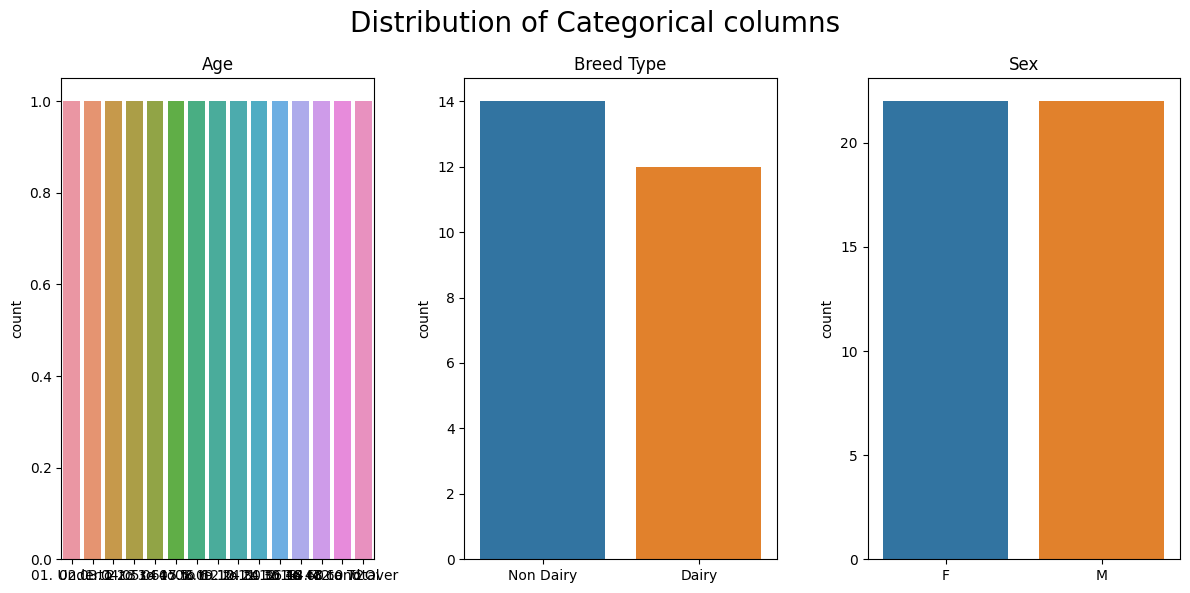

In [11]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(12, 6))

axes = axes.flat


for index, column in enumerate(data[cols]):
    sns.countplot(
        data=data,
        x=column,
        ax=axes[index]
    )
    axes[index].set_xlabel('')
    axes[index].set_title(column)

fig.suptitle('Distribution of Categorical columns', size=20)
fig.tight_layout()

In [15]:
data.columns

Index(['Age', 'Breed Type', 'Sex', 'AUSTRIA', 'CZECH REPUBLIC', 'DENMARK',
       'FRANCE', 'GERMANY', 'IRELAND', 'NETHERLANDS', 'NORTHERN IRELAND',
       'SWEDEN', 'Unnamed: 12'],
      dtype='object')

<AxesSubplot: xlabel='Age', ylabel='AUSTRIA'>

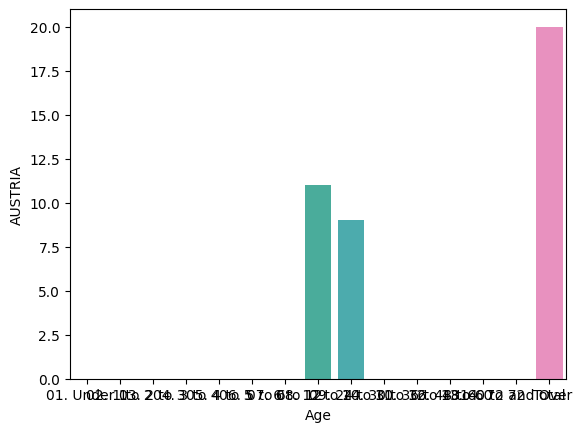

In [19]:
country_cols = ['AUSTRIA', 'CZECH REPUBLIC', 'DENMARK',
                'FRANCE', 'GERMANY', 'IRELAND', 'NETHERLANDS', 
                'NORTHERN IRELAND', 'SWEDEN']
for index, column
sns.barplot(
    data=data,
    x='Age',
    y='AUSTRIA'
)

In [34]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()

# for column in data.iloc[:, 1:3]:
#     data[column] = encoder.fit_transform(data[column].values)